# <p style="font-size:145%;margin:0;text-align:center;font-family:system-ui;font-weight:900"> <span style='color:#A0D2DB'>~ </span> Exploratory Data Analysis <span style='color:#A0D2DB'>~</span></p>

<div style="font-size:105%;font-family:sans-serif">
    

There are many articles about EDA, but I want to use a wonderful association from <a href=https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15/>one</a> of them.

Imagine the situation: you were advised to watch a movie that you had never heard before. Most people would start googling about this film. **Why?** Because they want to find out more about this film: genre, year of release, actors, someone would want to watch the trailer or read reviews. All these things can be called **exploratory data analysis**.

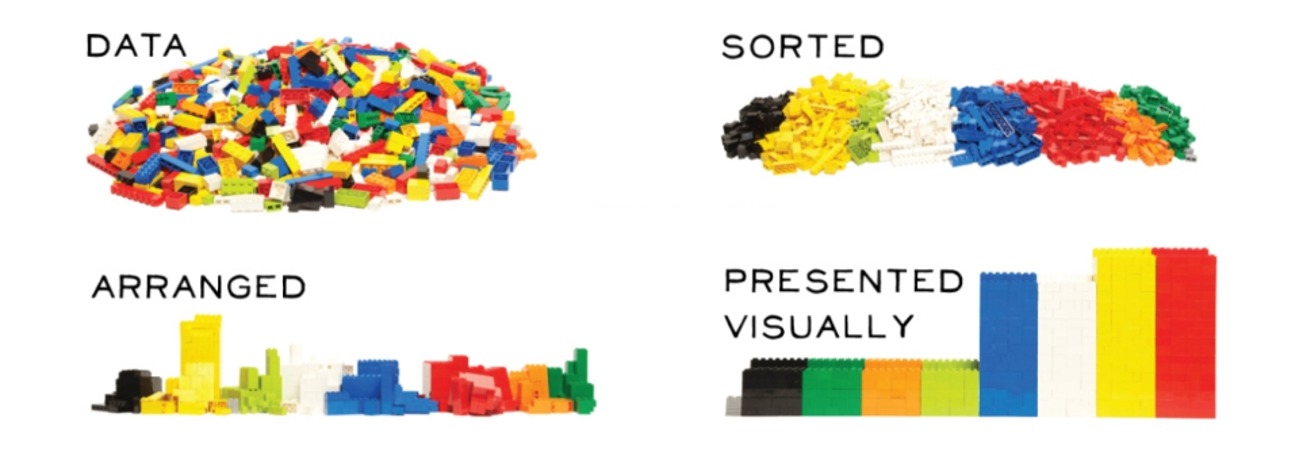

Let's move this idea to machine learning. Our first step in solving specific problem would be data analysis: we want to understand our data better, dive into the subject and, perhaps, find interesting patterns that can help us in the model building process


There is no strict rules about exploratory data analysis as well as no rules about Data Science. The reason is simple: it is an art.

<a id='contents'></a>
# <p style="font-size:100%;margin:0;font-family:system-ui;font-weight:900;color:#3B8EA5"> Table of contents </p>

<div style="font-size:105%;font-family:sans-serif">

1. [Data Overview](#section-one)
    * Data loading 
    * Basic information
    * Look closely at some columns
2. [Data Cleaning](#section-two)
    * Drop duplicates
    * Drop less infromative columns
    * Correct data types
    * Correct values
3. [Univariate Analysis](#section-three)
    * Numerical features analysis
    * Binary features analysis
    * Categorical features analysis
4. [Bivariate Analysis](#section-four)
    * Two Numerical variables
    * Numerical and categorical variables
    * Two Categorical variables
4. [Automated Analysis](#section-five)
    * Which libraries can we use to speed up our analysis process?
6. [Conclusion](#section-six)
    * Summary of our analysis
    * Recommendations

# <p style="font-size:100%;margin:0;font-family:system-ui;font-weight:900;color:#3B8EA5"> Problem statement</p>

<div style="font-size:105%;font-family:sans-serif">

Bangalore is a large city in India. It is home to many IT-companies. As you understand, people ase so busy there and for this reason the majority of them eat in various cafes and restaurants.  
**The dataset** is a collection of information about different restaurants in this city. **The task** is to study demographics and, based on the data, build a predictive model that allows to evaluate the possible rate of a new restaurant (depending on differents factors, such as *location*, *approximate costs*, *type of restaurant* and so on).

<img src="https://i.cdn.newsbytesapp.com/images/l121_21721505760195.jpg" width="350" alt="Picture" height="100" style="display: block; margin: 0 auto" />

<div style="font-size:105%;font-family:sans-serif">
    
The data was collected from the <a href=https://www.zomato.com/>Zomato</a> website. You can learn more in the dataset <a href=https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants>description</a>.

# <p style="font-size:100%;margin:0;font-family:system-ui;font-weight:900;color:#3B8EA5"> Libraries </p>

In [1]:
# analysis
import numpy as np 
import pandas as pd 

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# styles
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.2)
custom_colors = ['#3B8EA5','#C490D1','#2D728F','#A0D2DB', "#9EADC8", '#5B618A', '#5B507A']
customPalette = sns.set_palette(sns.color_palette(custom_colors))
main_cmap = sns.light_palette("#9EADC8", reverse=True, as_cmap=True)
pal1 = sns.light_palette('#2D728F', reverse=True, n_colors=10)
pal2 = sns.dark_palette('#C490D1', reverse=True, n_colors=10)

# fonts
font_titles = {'family': 'self-serif',
               'color':  "#9EADC8",
               'weight': 'bold',
               'size': 25,
               }

font_ticks = {'family': 'self-serif',
              'color':  '#4d4d4d',
              'weight': 'bold',
              'size': 14,
              }

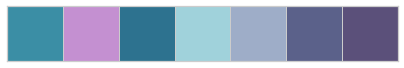

In [2]:
sns.palplot(sns.color_palette(custom_colors), size=1)

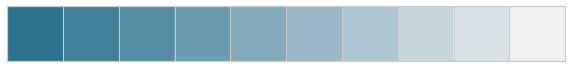

In [3]:
sns.palplot(pal1)

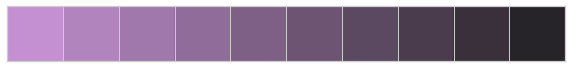

In [4]:
sns.palplot(pal2)

<a id="section-one"></a>
# <div style="color:white;display:fill;border-radius:15px;background-color:#2D728F;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:115%;margin:0;text-align:center;font-family:system-ui;font-weight:bold"> Data Overview</p></div>

<div style="font-size:105%;font-family:sans-serif">
    
The first thing we want to do is just look at **what kind of data we are working with**.
    
[table of contents](#contents)

<a id="section-one-one"></a>
## <b><span style='color:#2D728F'>1.1</span> ~ basic information </b>

In [5]:
data = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
data.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
14445,https://www.zomato.com/bangalore/reyniks-flavo...,"Shop F 6 & 7, Ittina Neela complex, Near Gold ...",Reyniks Flavours,No,No,NEW,0,+91 8971075658,Electronic City,Quick Bites,NaN,North Indian,150,[],[],Dine-out,Electronic City
39102,https://www.zomato.com/bangalore/k-b-r-fast-fo...,"Richmond Circle, Opposite PF Office, Richmond ...",K.B.R Fast Food,No,No,NaN,0,+91 9886182692,Richmond Road,Quick Bites,NaN,South Indian,300,[],[],Dine-out,Lavelle Road
39862,https://www.zomato.com/bangalore/new-prashanth...,"261, 17&18 Cross Sampige Road, Malleshwaram, B...",New Prashanth Hotel,No,No,3.1 /5,10,+91 9886588865,Malleshwaram,Quick Bites,NaN,"South Indian, Biryani",400,"[('Rated 2.5', 'RATED\n We had been to Prasan...",[],Delivery,Malleshwaram
41785,https://www.zomato.com/bangalore/subway-1-mara...,"77 Town Center, Yemalur Road, Marathahalli Vil...",Subway,Yes,No,3.6 /5,40,080 50470057,Marathahalli,Quick Bites,NaN,"Healthy Food, Sandwich, Salad",500,"[('Rated 4.0', ""RATED\n Tried their new subs....","['Hara Bhara Kebab Sub [12 inches, 30 cm]', 'M...",Dine-out,Marathahalli
6628,https://www.zomato.com/bangalore/amber-rush-re...,"1st & 2nd Floor, 17/4, Residency Road, Bangalore",Amber Rush Restobar,No,Yes,4.1/5,93,+91 9538892287\r\n+91 9900514899,Residency Road,Pub,"Cocktails, Pizza, Fries, Wings, Mango Phirni, ...","Continental, Chinese, Fast Food","1,000","[('Rated 3.0', ""RATED\n Been here for a lunch...",[],Drinks & nightlife,Brigade Road


In [6]:
print(f'number of entries: {len(data)}')
print(f'number of features: {len(data.columns)}')

number of entries: 51717
number of features: 17


<div style="font-size:105%;font-family:sans-serif">
    
**Columns description:**

* `url` contains the url of the restaurant in the zomato website

* `address` contains the address of the restaurant in Bengaluru

* `name` contains the name of the restaurant

* `online_order` whether online ordering is available in the restaurant or not

* `book_table` table book option available or not

* `rate` contains the overall rating of the restaurant out of 5

* `votes` contains total number of rating for the restaurant as of the above mentioned date

* `phone` contains the phone number of the restaurant

* `location` contains the neighborhood in which the restaurant is located

* `rest_type` restaurant type

* `dish_liked` dishes people liked in the restaurant

* `cuisines` food styles, separated by comma

* `approx_cost(for two people)` contains the approximate cost for meal for two people

* `reviews_list` list of tuples containing reviews for the restaurant, each tuple

* `menu_item` contains list of menus available in the restaurant

* `listed_in(type)` type of meal

* `listed_in(city)` contains the neighborhood in which the restaurant is listed
    
Now we want check our data: *does the above description match what we actually have ?*
    
Let's look at: <span style='color:#2D728F'>type</span> of each column, number of <span style='color:#2D728F'>null</span> values, number of <span style='color:#2D728F'>unique</span> values

In [7]:
pd.concat([data.dtypes, data.isna().sum(), data.nunique()], axis=1) \
  .rename(columns={0:'column type', 1:'number of NaN', 2:'number of unique'})

,column type,number of NaN,number of unique
url,object,0,51717
address,object,0,11495
name,object,0,8792
online_order,object,0,2
book_table,object,0,2
rate,object,7775,64
votes,int64,0,2328
phone,object,1208,14926
location,object,21,93
rest_type,object,227,93


<div style="font-size:105%;font-family:sans-serif">

<b> <span style='font-size:115%;color:#2D728F'> Observations №1: </span> </b>
* The data contains a lot of NaN values (including target column `rate`)
* There should be more numerical features (float or int type), but actually we see only one
* There are features that are very similar to each other according to the description (like `location` and `listed_in(city)`, `rest_type` and `listed_in(type)`)
* There are features whose values are lists

<a id="section-one-two"></a>
## <b><span style='color:#2D728F'>1.2</span> ~ Look carefully at some columns</b>

<div style="font-size:105%;font-family:sans-serif">

We need to get to know some columns better

#### <b> What about  <span style='color:#3B8EA5'>name </span>?</b>

the number of entries doesn't match the number of names, although logically it should be like this. <a href='https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants/discussion/253327?sort=published'>Answer</a> is that combination of `adress` and `name` column forms the primary key

In [8]:
data.name.value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

#### <b> What about  <span style='color:#3B8EA5'>rate </span>?</b>

Why it is not a numerical type?

In [9]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

As we can see, the reason is separator '/'.  
In addition, there are some mistakes ('NEW' and '-'), that should be removed

#### <b> What about <span style='color:#3B8EA5'>location</span> and <span style='color:#3B8EA5'>listed_in(city) </span>?</b>
We also could see that `location` and `listed_in(city)` columns are the same in the description, but first has 93 unique values and second has 30 unique values

<a href='https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants/discussion/115945?sort=published'>Answer:</a> `location` is a physical address, but `listed_in(city)` is registered on the website

In [10]:
display(data[["address", "location", "listed_in(city)"]])

,address,location,listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Banashankari,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Banashankari,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Banashankari,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Basavanagudi,Banashankari
...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Whitefield,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Whitefield,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Whitefield,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,"ITPL Main Road, Whitefield",Whitefield


In [11]:
with pd.option_context("display.max_colwidth", 120):
    display(data[data['location'] != data['listed_in(city)']][["address", 'location', 'listed_in(city)']])

,address,location,listed_in(city)
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi, Bangalore",Basavanagudi,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar Main Road, Basavanagudi, Bangalore",Basavanagudi,Banashankari
6,"19/1, New Timberyard Layout, Beside Satellite Bus Stop, Mysore Road, Bangalore",Mysore Road,Banashankari
29,"112, Bull Temple Road,next to more Basavanagudi, Bangalore",Basavanagudi,Banashankari
30,"30, Surveyor Street, DVG Road, Basavanagudi, Bangalore",Basavanagudi,Banashankari
...,...,...,...
51644,"7/3, ASK Tower, Kundanahalli Gate, Next to Bata Showroom, AECS Layout, Brookefield, Bangalore",Brookefield,Whitefield
51645,"Opposite Brookefield Mall, Kundanhalli, Brookefield, Bangalore",Brookefield,Whitefield
51681,"Sheraton Grand Bengaluru Whitefield Hotel & Convention Centre, Prestige Shantiniketan, ITPL Main Road, Whitefield","ITPL Main Road, Whitefield",Whitefield
51715,"Sheraton Grand Bengaluru Whitefield Hotel & Convention Centre, Prestige Shantiniketan, ITPL Main Road, Whitefield","ITPL Main Road, Whitefield",Whitefield


values in these columns are differ in the most of entries;  
but location is connected with address  

In [12]:
# values in the `listed_in(city)` is subset of values in `location`?
False if (set(data['listed_in(city)'].unique()) - set(data['location'].unique())) else True

True

#### <b> What about columns with <span style='color:#3B8EA5'>values separated by comma </span>?</b>

In [13]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

There are several values that are the same in the meaning but different in spelling ('Casual Dining, Cafe' and 'Cafe, Casual Dining'). The program won't be able to distinguish between them, so we need to fix it

In [14]:
data.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

#### <b> What about <span style='color:#3B8EA5'>reviews_list </span>and <span style='color:#3B8EA5'>menu_item </span>?</b>

In [15]:
data['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51717, dtype: object

In [16]:
data['reviews_list'].apply(lambda row: len(row))

0         3955
1         5256
2         7549
3        14876
4          702
         ...  
51712     3709
51713        2
51714        2
51715     3341
51716      945
Name: reviews_list, Length: 51717, dtype: int64

In [17]:
data['menu_item'].unique()[:2]

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

These columns contain a lot of text, so we are unlikely to use them. **But** it can be used for advanced analysis, such as extracting positive reviews and seeing what people value about particular restaurant

In [18]:
len(data[data['menu_item']=='[]'])

39617

#### <b> What about <span style='color:#3B8EA5'>approx_cost </span>?</b>
Why it has 'object' type?

In [19]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

we also need to fix this column

<a id="section-two"></a>
# <div style="color:white;display:fill;border-radius:15px;background-color:#2D728F;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:115%;margin:0;text-align:center;font-family:system-ui;font-weight:bold"> Data Cleaning</p></div>
<div style="font-size:105%;font-family:sans-serif">

Now (when we got to know our data a little better) we can proceed to the next important step: **make our data clear**.

**In this section we will:**
* deal with NaN values
* drop less informative columns
* rename some columns
* correct mistakes
* correct dtypes


[table of contents](#contents)   ///    [previous section](#section-one)

In [20]:
data[data.duplicated()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [21]:
# drop columns which is less informative
data.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list'], axis=1, inplace=True)

# drop column which has a lot of NaN values
data.drop(['dish_liked'], axis=1, inplace=True)

In [22]:
# correct 'rate' column
data.rate = data.rate.replace({'-': np.nan, 'NEW': np.nan})
data.rate = data.rate.astype(str)
data.rate = data.rate.apply(lambda row: row.replace('/5', ''))
data.rate = data.rate.astype(float)

In [23]:
# correct approx_cost column
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype('str')
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda row: row.replace(',', ''))
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(float)

In [24]:
# correct rest_type column (change order)
data['rest_type'] = data['rest_type'].astype('str')
data['rest_type'] = data['rest_type'].apply(lambda string: string.split(','))
data['rest_type'] = data['rest_type'].apply(lambda lst: sorted([string.strip() for string in lst]))
data['rest_type'] = data['rest_type'].apply(lambda lst: ', '.join(lst))

# correct cuisines column (change order)
data['cuisines'] = data['cuisines'].astype('str')
data['cuisines'] = data['cuisines'].apply(lambda string: string.split(','))
data['cuisines'] = data['cuisines'].apply(lambda lst: sorted([string.strip() for string in lst]))
data['cuisines'] = data['cuisines'].apply(lambda lst: ', '.join(lst))

In [25]:
data.rest_type.nunique(), data.cuisines.nunique()

(70, 1921)

In [26]:
# change names of some columns
data = data.rename(columns={'approx_cost(for two people)': 'cost',
                            'listed_in(type)': 'type',
                            'listed_in(city)': 'city'})

# drop rows with NaN values
data.dropna(how='any', inplace=True)

# drop duplicates (it can appear after removing columns)
data.drop_duplicates(inplace=True)

check data after cleaning

In [27]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai, North Indian",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Italian, Mexican",800.0,Buffet,Banashankari


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41345 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41345 non-null  object 
 1   online_order  41345 non-null  object 
 2   book_table    41345 non-null  object 
 3   rate          41345 non-null  float64
 4   votes         41345 non-null  int64  
 5   location      41345 non-null  object 
 6   rest_type     41345 non-null  object 
 7   cuisines      41345 non-null  object 
 8   cost          41345 non-null  float64
 9   type          41345 non-null  object 
 10  city          41345 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.8+ MB


In [29]:
pd.concat([data.dtypes, data.nunique()], axis=1) \
  .rename(columns={0:'column type', 1:'number of unique'})

,column type,number of unique
name,object,6627
online_order,object,2
book_table,object,2
rate,float64,31
votes,int64,2323
location,object,92
rest_type,object,67
cuisines,object,1695
cost,float64,63
type,object,7


<div style="font-size:105%;font-family:sans-serif">

<b> <span style='font-size:115%;color:#2D728F'> Observations №2: </span> </b>
* There are 3 *numerical* features: `rate` (target), `votes`, `cost`
* There are 2 *binary* features: `online_order`, `book_table`
* The remaining columns are *categorical*
* We drop a lot of entries, but it is only for EDA. We can recover these entries and use Imputer to deal with NaN values in the step of feature engineering


<a id="section-three"></a>
# <div style="color:white;display:fill;border-radius:15px;background-color:#2D728F;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:115%;margin:0;text-align:center;font-family:system-ui;font-weight:bold"> Univariate Analysis </p></div>

<div style="font-size:105%;font-family:sans-serif">

**Univariate analysis** is the analysis of one variable. The **purpose** is to understand the <span style='color:#2D728F'>distribution</span> of values and find out the <span style='color:#2D728F'>central tendencies</span> of our variable.
    
A common (and good) way is to use various types of graphs to visualize any distribution. Se let's do it

[table of contents](#contents)   ///    [previous section](#section-two)

<a id="section-three-one"></a>
## <b><span style='color:#2D728F'>3.1</span> ~ Numerical features </b>

<div style="font-size:105%;font-family:sans-serif">

* We can measure important central tendencies such as mean, median, percentiles
* We can use `boxplot`, `kdeplot`, `histplot`, `violinplot` for visualization

In [30]:
# extract numerical features from our data
num_features = [feature for feature in data.columns if data[feature].dtype != 'object']
num_features

['rate', 'votes', 'cost']

#### <b> Look at the <span style='color:#3B8EA5'>central tendency</span></b>

In [31]:
data[num_features].describe()

,rate,votes,cost
count,41345.000000,41345.000000,41345.000000
mean,3.700070,351.110171,602.900133
std,0.440581,881.979858,464.035168
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,275.000000,700.000000
max,4.900000,16832.000000,6000.000000


#### <b> Look at the <span style='color:#3B8EA5'>distribution</span></b>

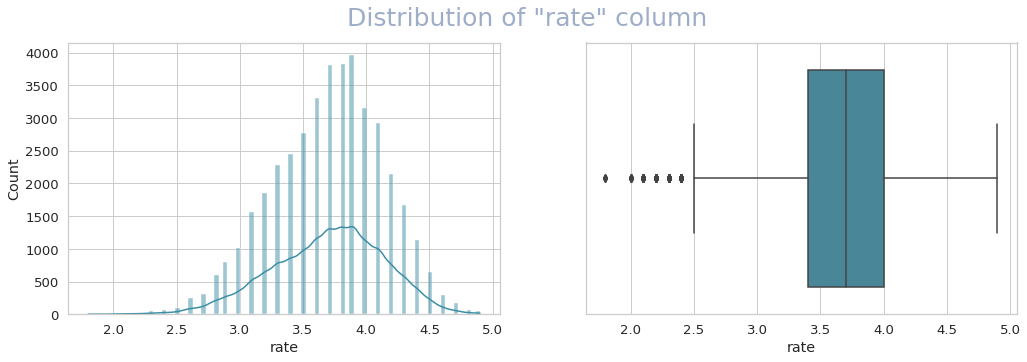

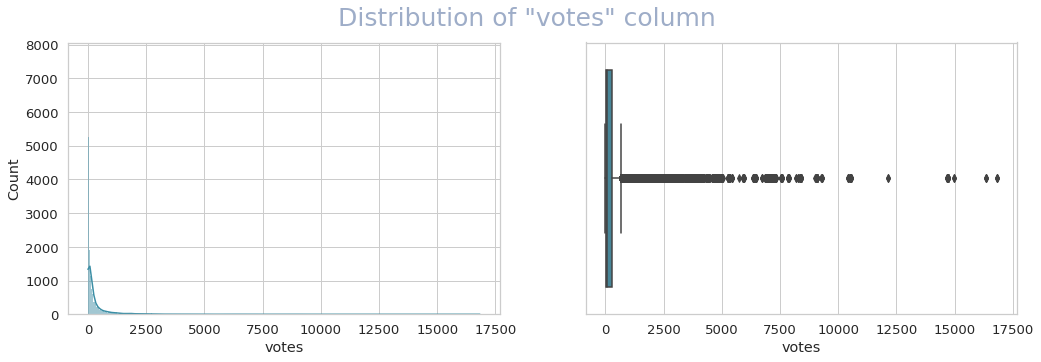

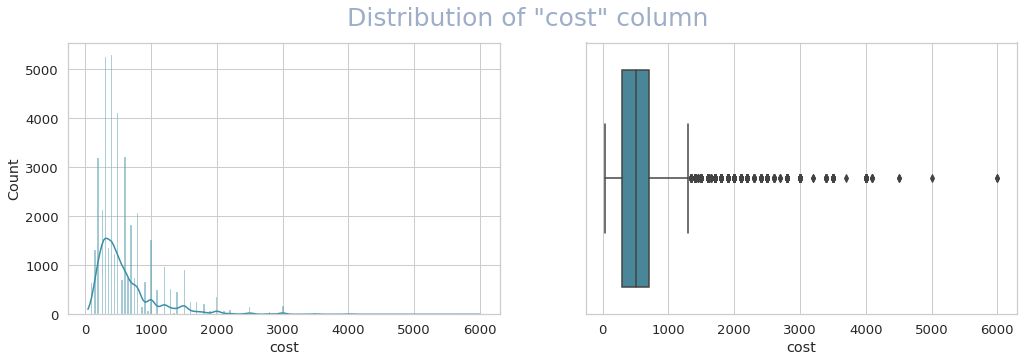

In [32]:
# use visualization tools to check distribution
for feature in num_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
    #data[feature].hist(ax=ax1)
    sns.histplot(x=data[feature], ax=ax1, kde=True)
    sns.boxplot(x=data[feature], ax=ax2)
    plt.suptitle(f'Distribution of "{feature}" column', size=25, fontdict=font_titles)
    plt.show()

<div style="font-size:105%;font-family:sans-serif">

<b> <span style='font-size:115%;color:#2D728F'> Observations №3: </span> </b>
* `votes` has a very wide range
* `rate` has a normal distribution
* `votes` and `cost` are skewed right
* `votes` has a lot of abnormal values (outliers)

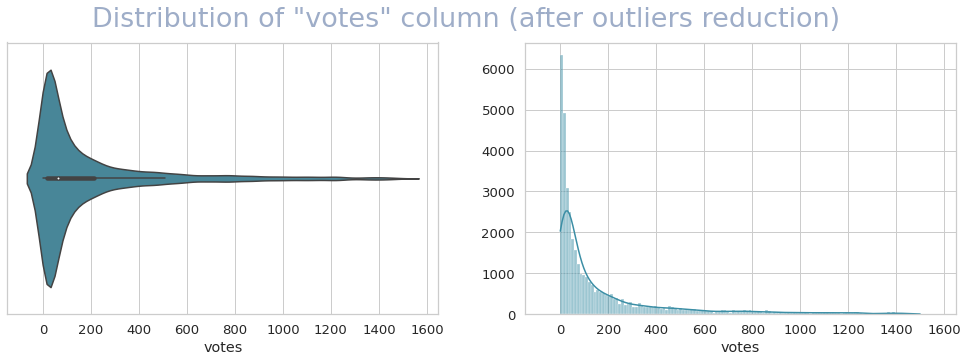

In [33]:
sub_data_votes = data[data['votes']<1500]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5), sharex=True)
sns.violinplot(x=sub_data_votes['votes'], ax=ax1)
sns.histplot(x=sub_data_votes['votes'], kde=True, ax=ax2)
ax2.set(ylabel=None)
plt.suptitle('Distribution of "votes" column (after outliers reduction)', size=27, fontdict=font_titles)
plt.show()

<a id="section-three-two"></a>
## <b><span style='color:#2D728F'>3.2</span> ~ Binary features </b>

* We can use frequency table, where the number of entries will be calculated for each category. This method is suitable for both binary and categorical features.
* For visualization we can use `barplot`, `conutplot`, `piechart`

In [34]:
binary_features = [feature for feature in data.columns
                   if data[feature].nunique() == 2]
binary_features

['online_order', 'book_table']

In [35]:
# frequency table
for feature in binary_features:
    display(data[feature].value_counts())
    print()

Yes    27150
No     14195
Name: online_order, dtype: int64

No     35070
Yes     6275
Name: book_table, dtype: int64

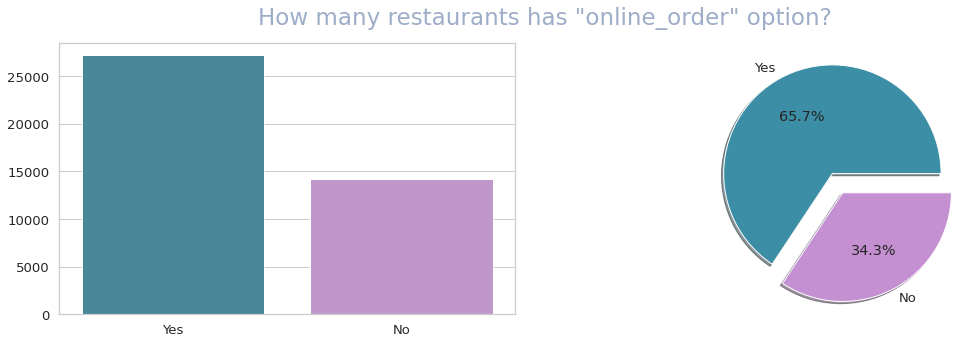

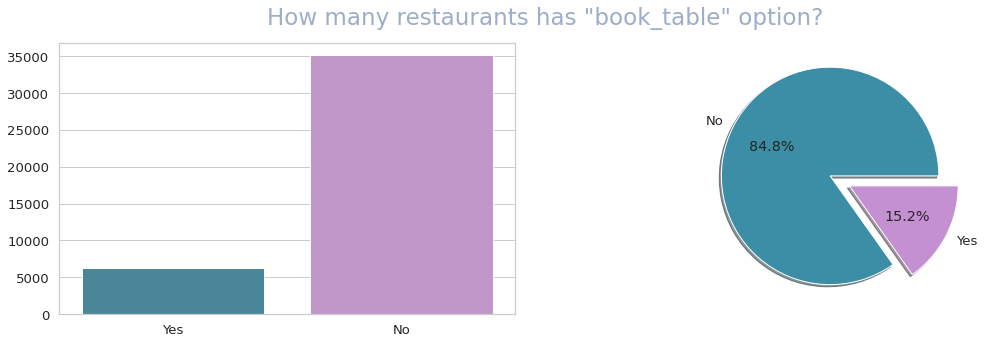

In [36]:
# visualization of frequency table
for feature in binary_features:
    fig, ax = plt.subplots(1, 2, figsize=(18, 5))
    sns.countplot(x=data[feature], ax=ax[0])
    data[feature].value_counts().plot.pie(explode=[0.05, 0.15], autopct="%1.1f%%", shadow=True, ax=ax[1])
    
    ax[0].set(xlabel=None, ylabel=None)
    ax[1].set(xlabel=None, ylabel=None)
    
    plt.suptitle(f'How many restaurants has "{feature}" option?', size=23, fontdict=font_titles)

<div style="font-size:105%;font-family:sans-serif">

<b> <span style='font-size:115%;color:#2D728F'> Observations №4: </span> </b>
* the majority of restaurants has 'online order' option (arount **65%**)
* the minority of restaurants has 'book table' option (around **15%**)

<a id="section-three-three"></a>
## <b><span style='color:#2D728F'>3.3</span> ~ Categorical features </b>

In [37]:
cat_features = [feature for feature in data.columns  
                if data[feature].dtype == 'object' 
                   and feature not in ['reviews_list', 'online_order', 'book_table']]
cat_features

['name', 'location', 'rest_type', 'cuisines', 'type', 'city']

In [38]:
data[cat_features].describe()

,name,location,rest_type,cuisines,type,city
count,41345,41345,41345,41345,41345,41345
unique,6627,92,67,1695,7,30
top,Cafe Coffee Day,BTM,Quick Bites,"Chinese, North Indian",Delivery,BTM
freq,86,3900,13861,2313,20494,2591


Because some features have a lot of unique values, it will be difficult to visualize all of them. So we use the most frequent categories

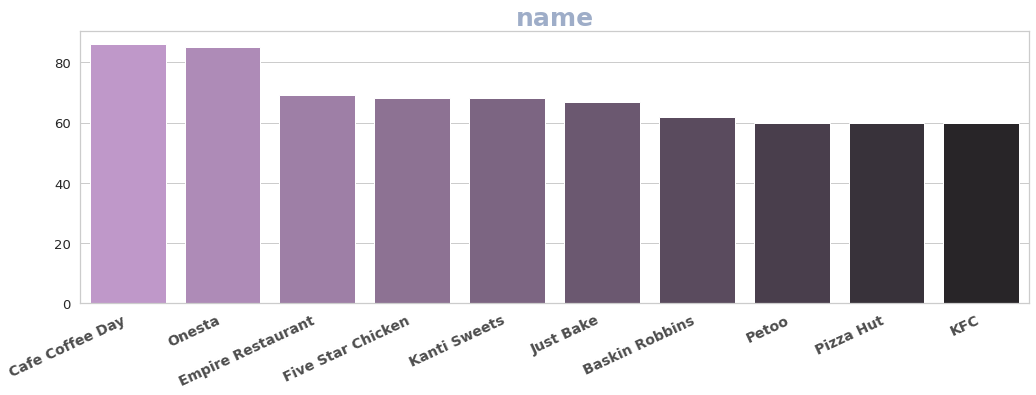

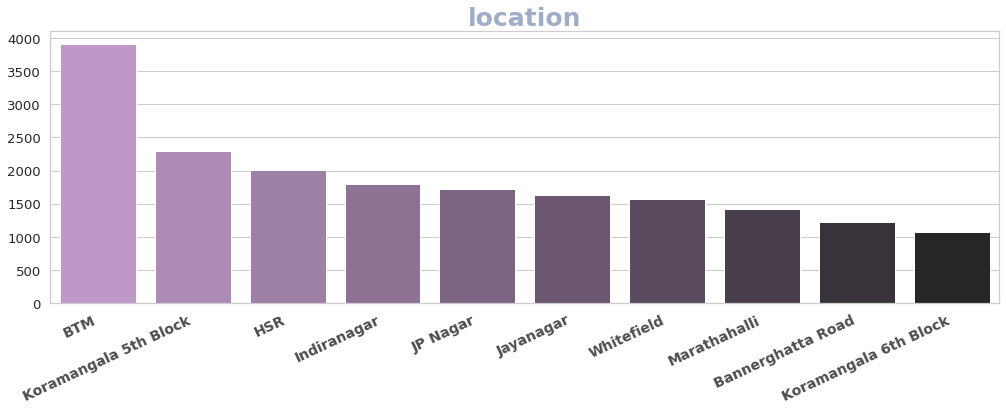

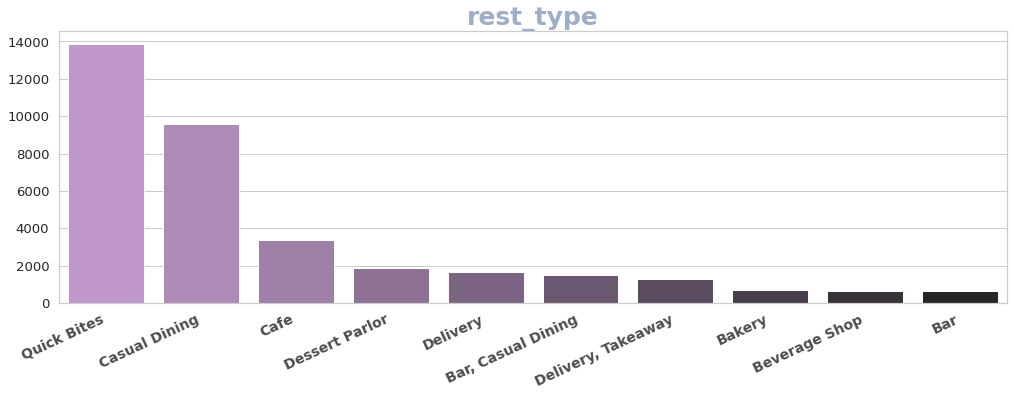

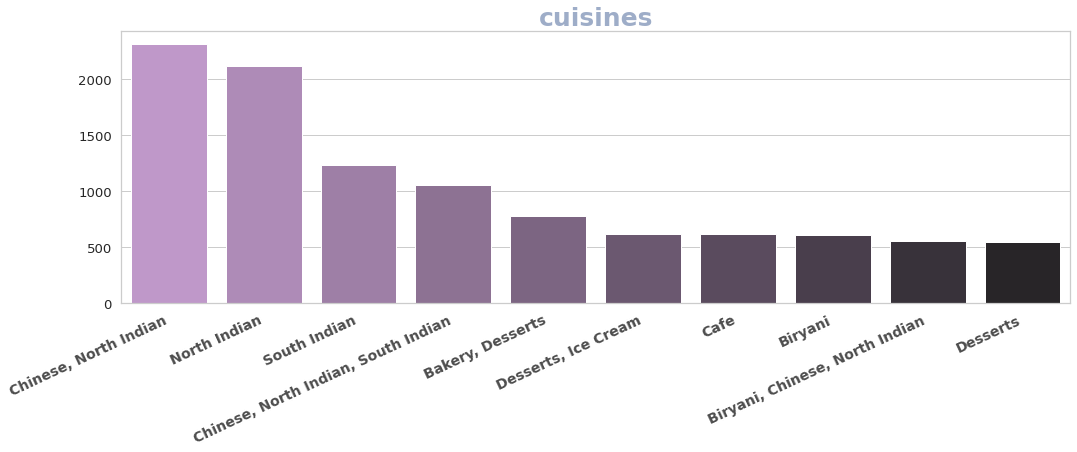

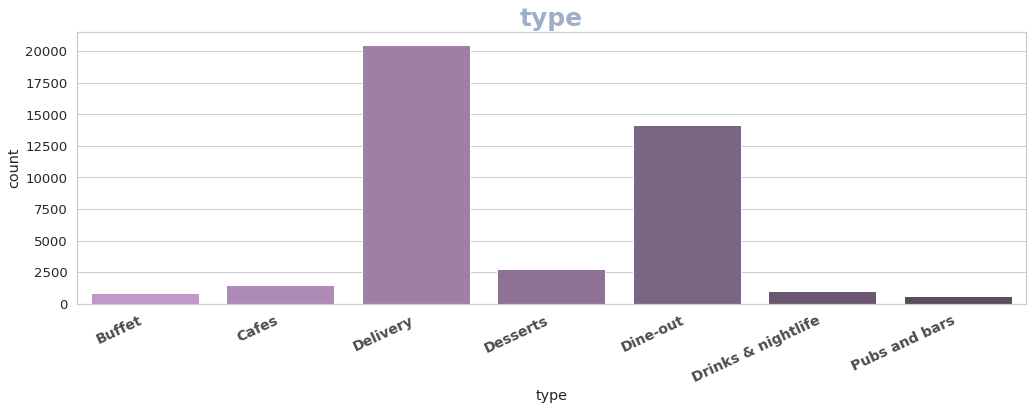

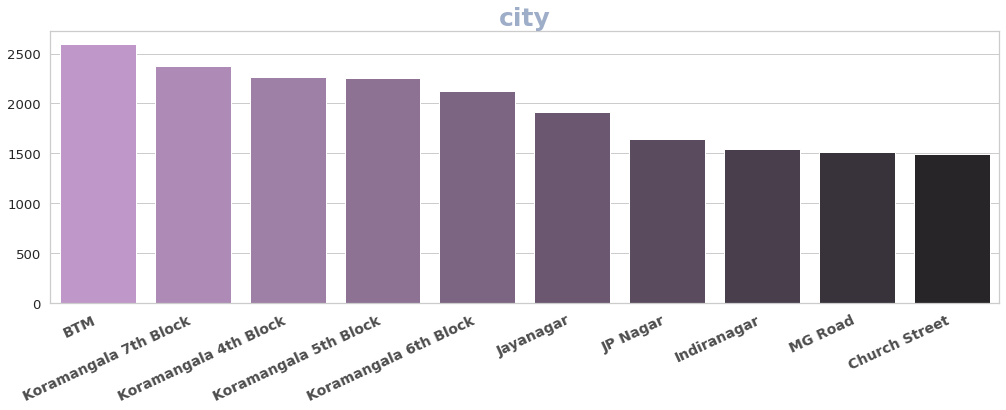

<Figure size 432x288 with 0 Axes>

In [39]:
for feature in cat_features:
    fig = plt.figure(figsize=(17, 5))
    if data[feature].nunique() > 10:
        sub_data_per_feature = data[feature].value_counts()[:10]
        ax = sns.barplot(y=sub_data_per_feature.values, x=sub_data_per_feature.index, palette=pal2)
    else:
        ax = sns.countplot(x=data[feature], palette=pal2)
    # rotate labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right', fontdict=font_ticks)
    plt.title(feature, fontdict=font_titles)
    plt.show()
    
plt.tight_layout()

<div style="font-size:105%;font-family:sans-serif">

<b> <span style='font-size:115%;color:#2D728F'> Observations №5: </span> </b>
* Most restaurants has a 'delivery' and 'Quick Bites' types
* The 'BTM' area has the largest number of restaurants

<a id="section-four"></a>
# <div style="color:white;display:fill;border-radius:15px;background-color:#2D728F;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:115%;margin:0;text-align:center;font-family:system-ui;font-weight:bold"> Bivariate Analysis</p></div>

<div style="font-size:105%;font-family:sans-serif">
    
We are often interested in relationship between two variables. **Bivariate analysis**  help us to determine it.
    
In this section we will also use different graphs to visualize the relation of various variables

[table of contents](#contents)   ///    [previous section](#section-three)

<a id="section-four-one"></a>
## <b><span style='color:#2D728F'>4.1</span> ~ Numerical vs Numerical</b>

<div style="font-size:105%;font-family:sans-serif">

* We can use a `scatterplot` to visualize our data in two dimensions (where one feature is x-axis and other is y-axis)
* We can measure correlation between these variables and use `heatmap` to visualize it

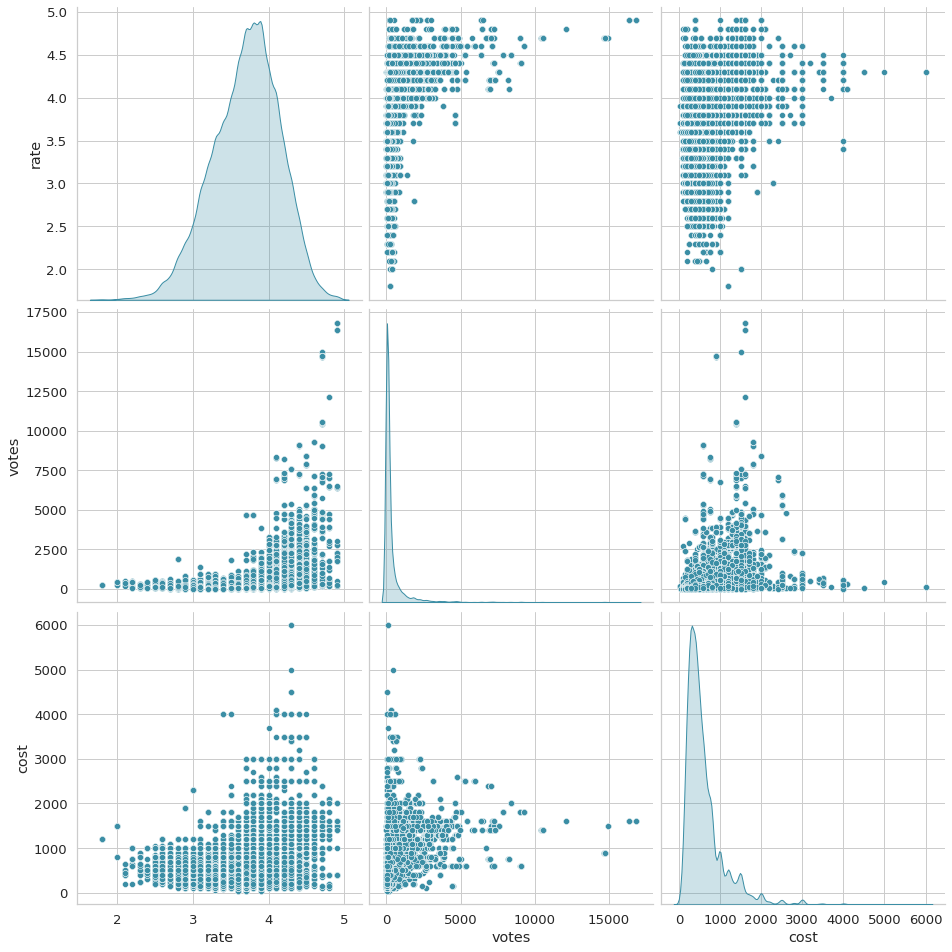

In [40]:
%config InlineBackend.figure_format='png'
sns.pairplot(data[num_features], height=4.5, kind='scatter', diag_kind='kde')
# might use kind = 'reg'/ diag_kind = 'hist'

<AxesSubplot:>

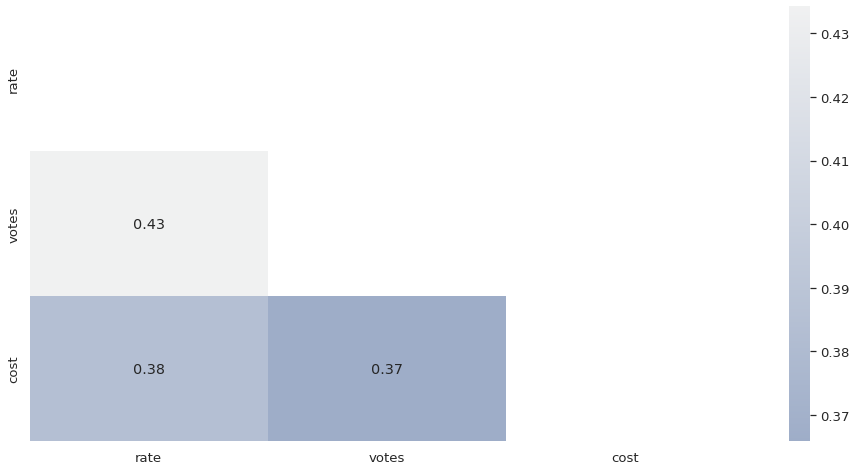

In [41]:
m = data[num_features].corr()
# to visualize only half of heatmap
half_mask = np.zeros(m.shape, dtype=bool)
half_mask[np.triu_indices_from(half_mask)]=True

plt.figure(figsize=(16, 8))
sns.heatmap(m, mask=half_mask, annot=True, cmap=main_cmap)

<a id="section-four-two"></a>
## <b><span style='color:#2D728F'>4.2</span> ~ Numerical vs Categorical</b>

<div style="font-size:105%;font-family:sans-serif">

* We can use a `boxplot` or 'barplot` for numerical feature against the categorical feature
* We can also look at the distribution of numerical variables for each category using `kdeplot` or `histplot`

#### <b> Look at the <span style='color:#3B8EA5'>distribution</span> for each binary features value </b>

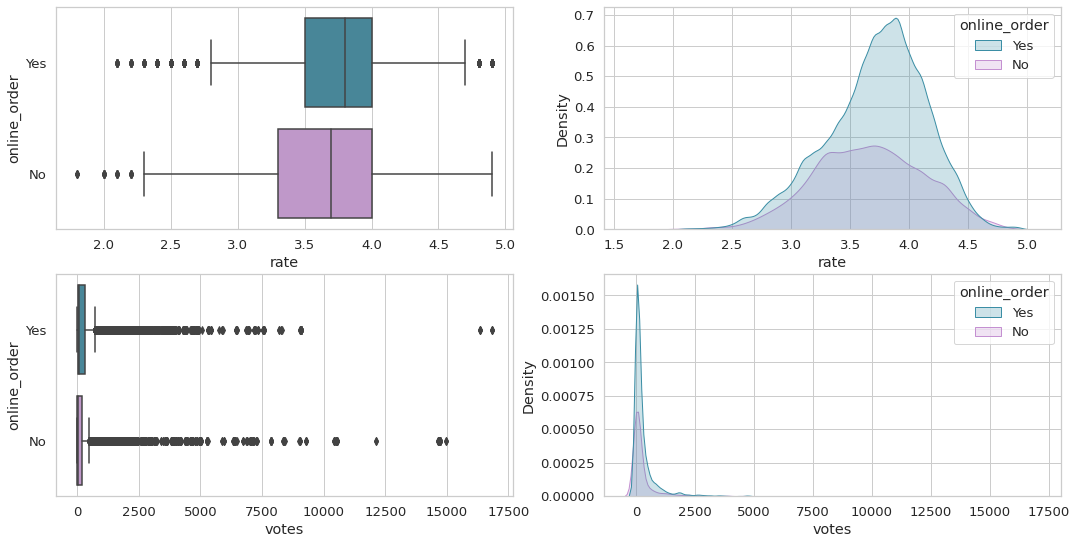

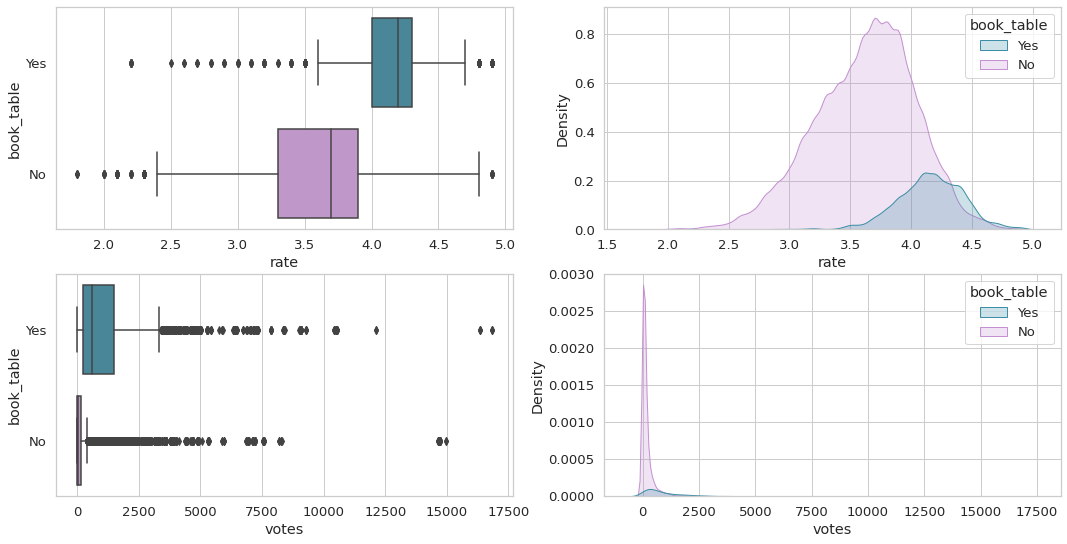

In [42]:
for binary_feature in binary_features:
    fig, ax = plt.subplots(2, 2, figsize=(18, 9))
    for i, num_feature in enumerate(['rate', 'votes']):
        #sns.violinplot(x=binary_feature, y=num_feature, data=data, ax=ax[i])
        #sns.barplot(x=binary_feature, y=num_feature, data=data, ax=ax[i], estimator=np.median)
        #sns.barplot(x=binary_feature, y=num_feature, data=data, ax=ax[i], estimator=np.mean)
        sns.boxplot(y=binary_feature, x=num_feature, data=data, ax=ax[i, 0])
        sns.kdeplot(x=num_feature, data=data, hue=binary_feature, ax=ax[i, 1], fill=True)

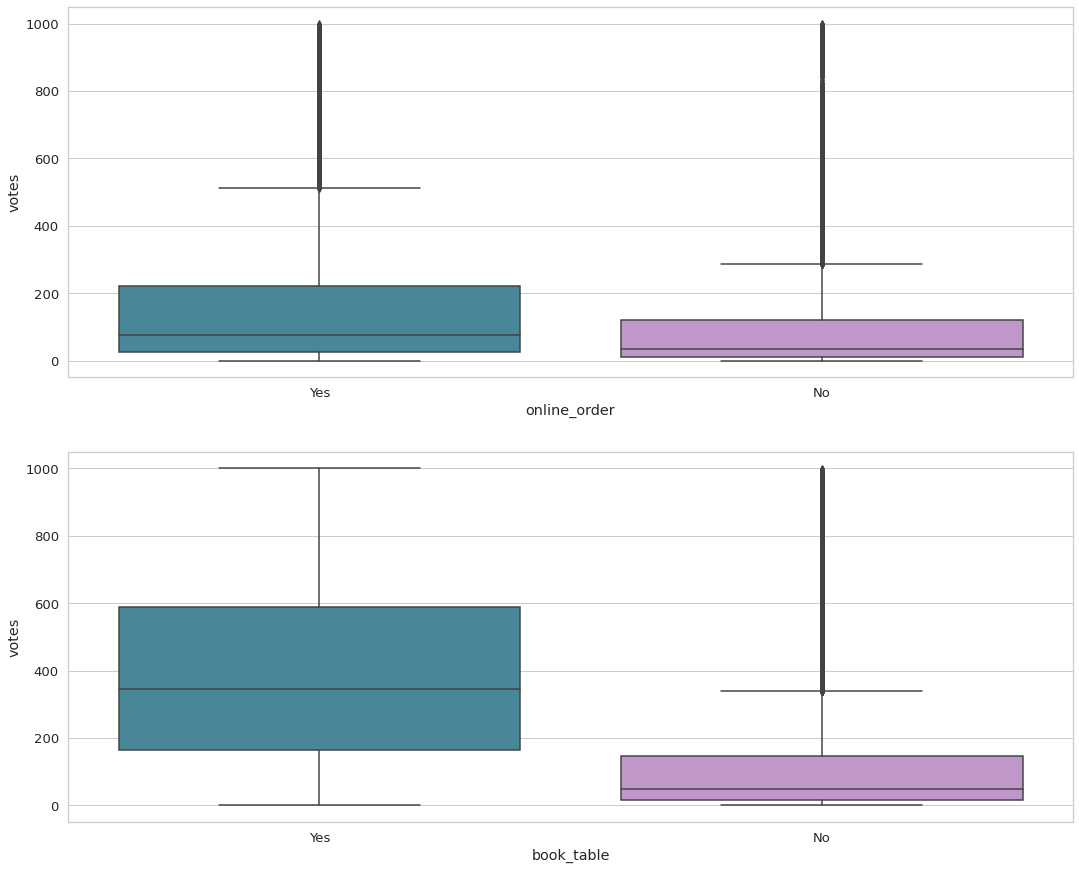

In [43]:
fig, ax = plt.subplots(len(binary_features), 1, figsize=(18, 15))
for i, binary_feature in enumerate(binary_features):
    sns.boxplot(y='votes', x=binary_feature, data=data[data['votes'] <= 1000], ax=ax[i])

<div style="font-size:105%;font-family:sans-serif">

<b> <span style='font-size:115%;color:#2D728F'> Observation №6: </span> </b>
* The restaurants that have 'online order' or 'book table' option have a better rating (and it is logical)

#### <b> Look at the <span style='color:#3B8EA5'>TOP 5</span> categories by cost</b>

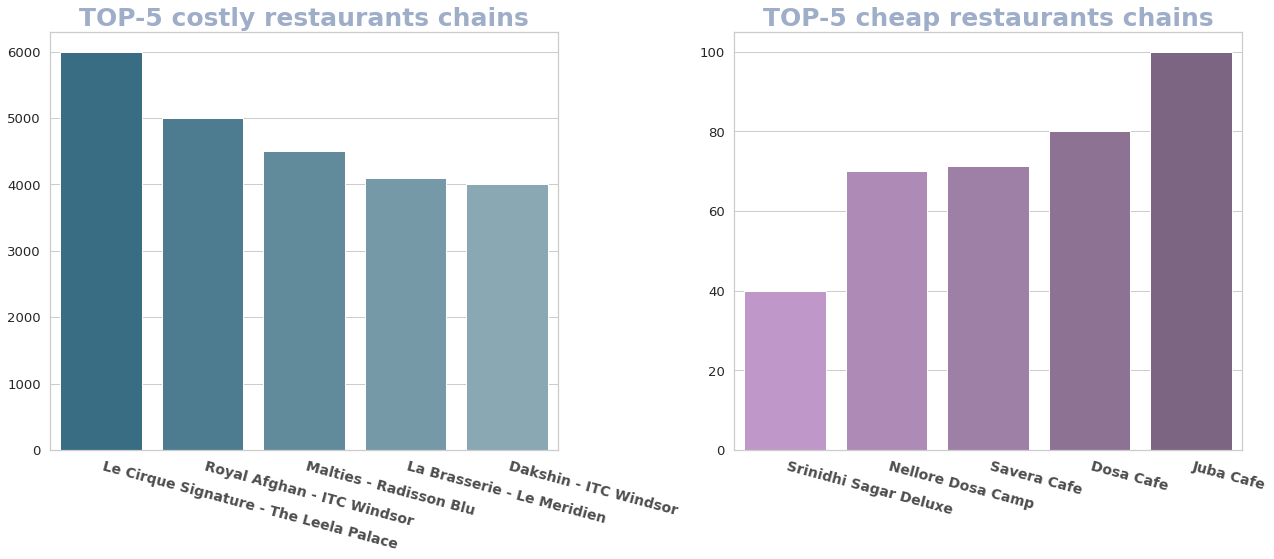

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
tmp = data.groupby('name').agg({'cost':'mean'}) \
           .rename(columns={'cost':'mean cost'})
    
sns.barplot(x=tmp.sort_values('mean cost', ascending=False)[:5].index,
            y=tmp.sort_values('mean cost', ascending=False)['mean cost'][:5], ax=ax1,
            palette=pal1)
    
sns.barplot(x=tmp.sort_values('mean cost')[:5].index,
            y=tmp.sort_values('mean cost')['mean cost'][:5], ax=ax2,
            palette=pal2)

ax1.set_title('TOP-5 costly restaurants chains', fontdict=font_titles)
ax1.set_xticklabels(ax1.get_xticklabels(), fontdict=font_ticks, rotation=-15, ha='left', )
ax1.set(xlabel=None, ylabel=None)

ax2.set_title('TOP-5 cheap restaurants chains', fontdict=font_titles)
ax2.set_xticklabels(ax2.get_xticklabels(), fontdict=font_ticks, rotation=-15, ha='left')
ax2.set(xlabel=None, ylabel=None)
    
plt.tight_layout()

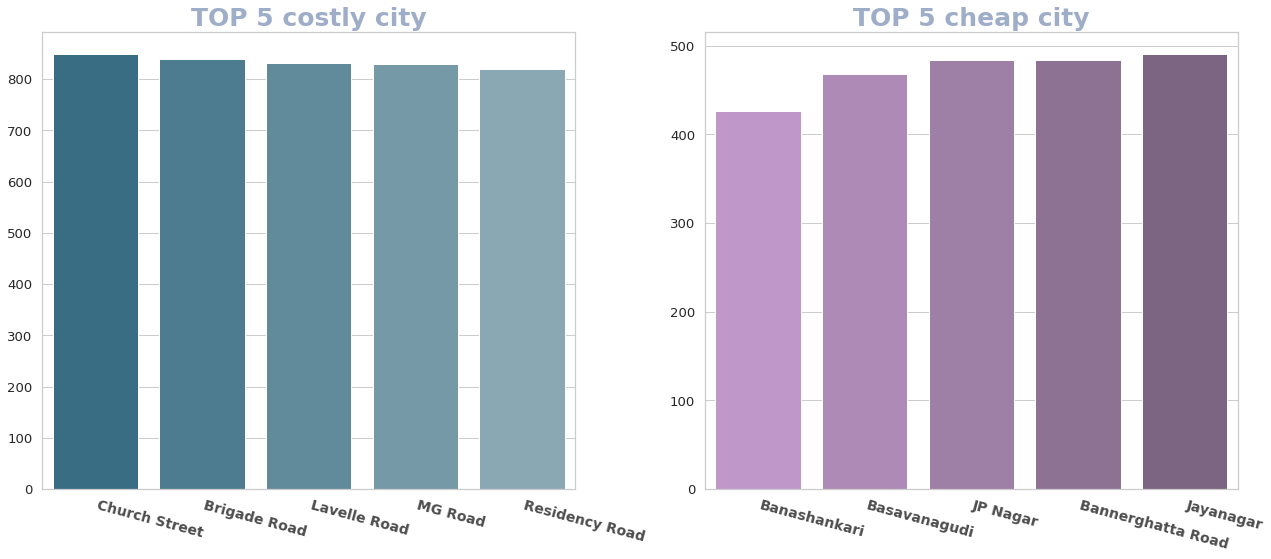

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
tmp = data.groupby('city').agg({'cost':'mean'}) \
           .rename(columns={'cost':'mean cost'})
    
sns.barplot(x=tmp.sort_values('mean cost', ascending=False)[:5].index,
            y=tmp.sort_values('mean cost', ascending=False)['mean cost'][:5], ax=ax1,
            palette=pal1)
    
sns.barplot(x=tmp.sort_values('mean cost')[:5].index,
            y=tmp.sort_values('mean cost')['mean cost'][:5], ax=ax2,
            palette=pal2)

ax1.set_title('TOP 5 costly city', fontdict=font_titles)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-15, ha='left', fontdict=font_ticks,)
ax1.set(xlabel=None, ylabel=None)

ax2.set_title('TOP 5 cheap city', fontdict=font_titles)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-15, ha='left', fontdict=font_ticks,)
ax2.set(xlabel=None, ylabel=None)
    
plt.tight_layout()

#### <b> Look at the <span style='color:#3B8EA5'>TOP 5</span> categories by rate</b>

In [46]:
# one correction to visualize
data.loc[data['name']=='SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine', 'name']='Spa Cuisine'

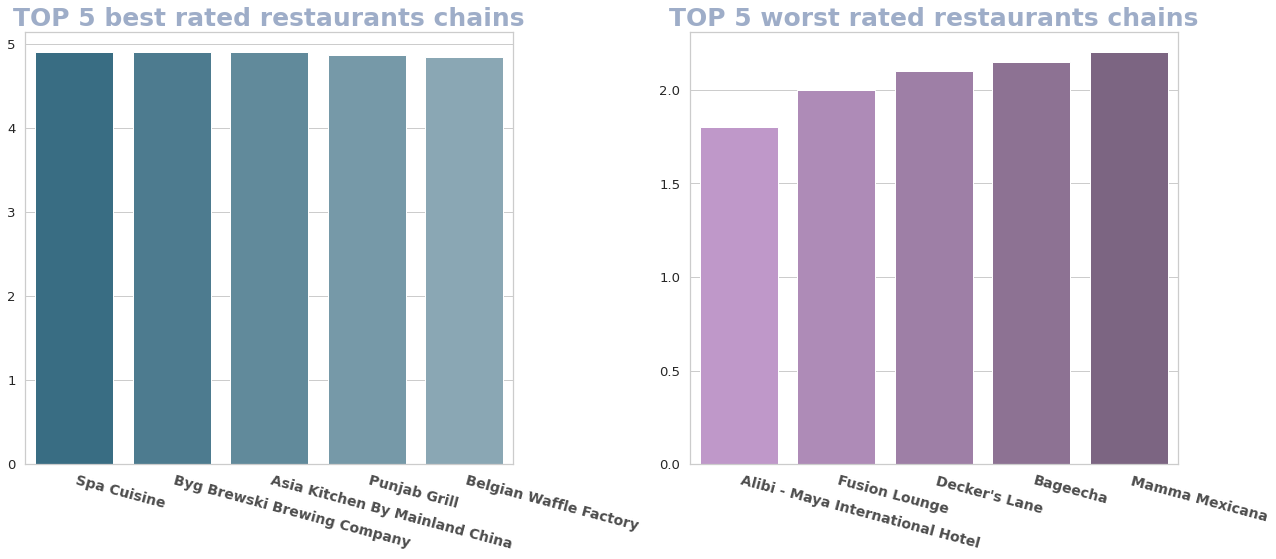

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
tmp = data.groupby('name').agg({'rate':'mean'}) \
           .rename(columns={'rate':'mean rate'})
    
sns.barplot(x=tmp.sort_values('mean rate', ascending=False)[:5].index,
            y=tmp.sort_values('mean rate', ascending=False)['mean rate'][:5], ax=ax1,
            palette=pal1)
    
sns.barplot(x=tmp.sort_values('mean rate')[:5].index,
            y=tmp.sort_values('mean rate')['mean rate'][:5], ax=ax2,
            palette=pal2)

ax1.set_title('TOP 5 best rated restaurants chains', fontdict=font_titles)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-15, ha='left', fontdict=font_ticks)
ax1.set(xlabel=None, ylabel=None)

ax2.set_title('TOP 5 worst rated restaurants chains', fontdict=font_titles)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-15, ha='left', fontdict=font_ticks)
ax2.set(xlabel=None, ylabel=None)
    
plt.tight_layout()

#### <b> Look at the <span style='color:#3B8EA5'>rate</span> for each restaurant type</b>

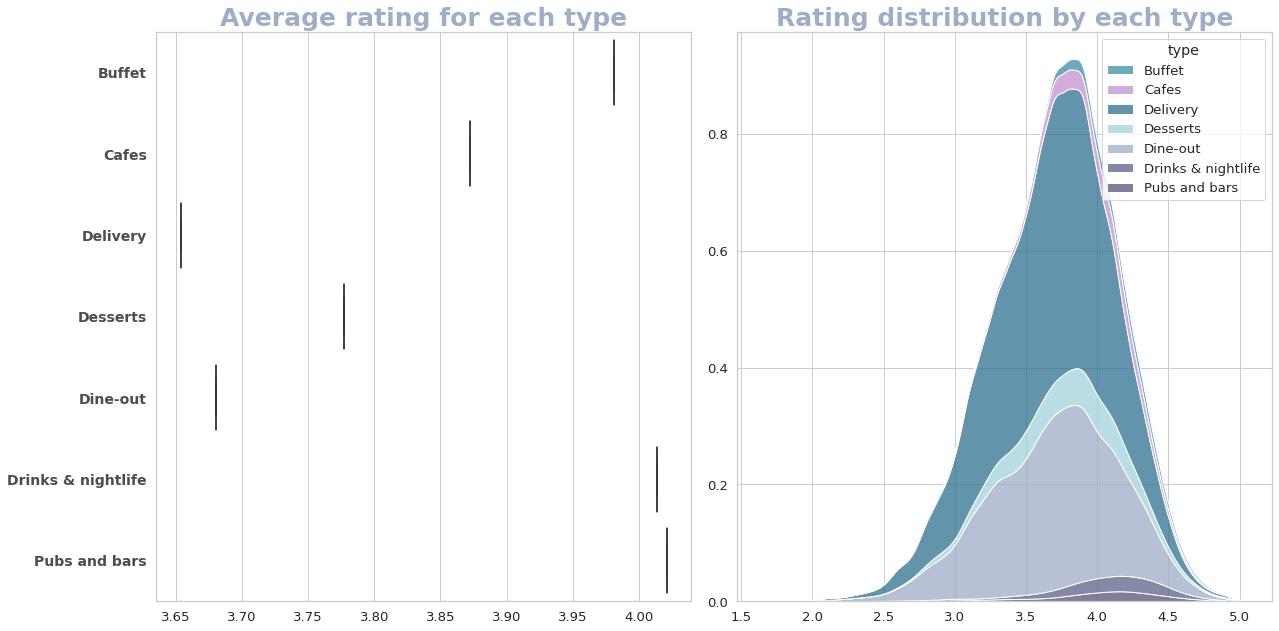

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
tmp = data.groupby('type').agg({'rate':'mean'}) \
          .rename(columns={'rate':'mean rate'})
sns.boxplot(y=tmp.index, x=tmp['mean rate'], ax=ax1)
sns.kdeplot(x='rate', hue='type', data=data, ax=ax2, multiple='stack')
ax1.set_yticklabels(ax1.get_yticklabels(), fontdict=font_ticks)
ax1.set(xlabel=None, ylabel=None)
ax1.set_title('Average rating for each type', fontdict=font_titles)

ax2.set(xlabel=None, ylabel=None)
ax2.set_title('Rating distribution by each type', fontdict=font_titles)

plt.tight_layout()

<a id="section-four-three"></a>
## <b><span style='color:#2D728F'>4.3</span> ~ Categorical vs Categorical </b>
<div style="font-size:105%;font-family:sans-serif">

* We can use `contigency table` with multivariate frequency distribution. We can aslo perform Chi-2 testing
* We can  use the `countiplot` for visualizing

In [49]:
!pip install scipy

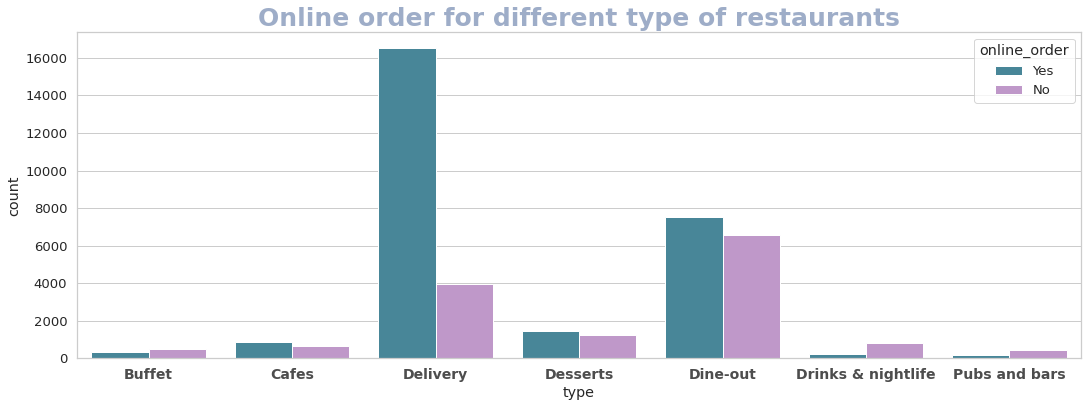

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.countplot(x='type', hue='online_order', data=data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_ticks)
plt.title('Online order for different type of restaurants', fontdict=font_titles)
plt.show()

In [51]:
c_tab = pd.crosstab(index=data['city'], columns=data['type'])
c_tab

type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
city,,,,,,,
BTM,37,89,1408,148,822,41,46
Banashankari,7,24,402,48,240,7,0
Bannerghatta Road,16,34,683,78,390,15,0
Basavanagudi,14,43,541,86,376,12,0
Bellandur,28,23,512,65,299,17,17
Brigade Road,57,72,566,102,540,74,71
Brookefield,31,30,646,60,369,14,0
Church Street,60,75,527,106,581,76,70
Electronic City,20,18,353,46,348,20,19


In [52]:
from scipy.stats import chi2_contingency

test, p_value, DF, expected = chi2_contingency(c_tab)
print(f'p_value (for `type` and `city` dependency) is {p_value}')

p_value (for `type` and `city` dependency) is 1.5291029534191311e-295


<a id="section-five"></a>
# <div style="color:white;display:fill;border-radius:15px;background-color:#2D728F;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:115%;margin:0;text-align:center;font-family:system-ui;font-weight:bold"> Automated Analysis</p></div>
<div style="font-size:105%;font-family:sans-serif">

People are trying to <strike>improve</strike> simplify their lives, so they are trying to automate many processes. For this reason, there are many libraries for automatic exploratory data analysis.

**You can use:**
- Pandas Profilling
- DTale
- LUX
+ DataPrep
+ AutoViz  

And more other. Remember that there is no library that can cover any problem. Automation tools can be useful as a baseline (this is often enough, *but not always*).
    
[table of contents](#contents)   ///    [previous section](#section-four)

In [53]:
#!pip install dataprep
#from dataprep.eda import create_report

#create_report(data)

<a id="section-six"></a>
# <div style="color:white;display:fill;border-radius:15px;background-color:#2D728F;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:115%;margin:0;text-align:center;font-family:system-ui;font-weight:bold"> Conclusion </p></div>
<div style="font-size:105%;font-family:sans-serif">


[table of contents](#contents)   ///    [previous section](#section-five)

<a id="section-six-one"></a>
## <b><span style='color:#2D728F'>6.1</span> ~ Summary </b>

<div style="font-size:105%;font-family:sans-serif">

Exploratory data analysis is important for any research. **The main purpose** is to understand the data. In addition, you can find interesting insights, highlight patterns, and detect inaccuracies in your data. All this will undoubtedly have value in your analysis.
    
<b> <span style='font-size:115%;color:#2D728F'> All observations in one place: </span> </b>
1. After [data overview](#section-one):
    * The data contains a lot of NaN values (including target column `rate`)
    * There should be more numerical features (float or int type), but actually we see only one
    * There are features that are very similar to each other according to the description (like `location` and `listed_in(city)`, `rest_type` and `listed_in(type)`)
    * There are features whose values are lists
2. After [data cleaning](#section-two):
    * There are 3 *numerical* features: `rate` (target), `votes`, `cost`
    * There are 2 *binary* features: `online_order`, `book_table`
    * The remaining columns are *categorical*
    * We drop a lot of entries, but it is only for EDA. We can recover these entries and use Imputer to deal with NaN values in the step of feature engineering
3. After [univariate analysis](#section-three):
    * `votes` has a very wide range
    * `rate` has a normal distribution
    * `votes` and `cost` are skewed right
    * `votes` has a lot of abnormal values (outliers)
    * the majority of restaurants has 'online order' option (arount **65%**)
    * the minority of restaurants has 'book table' option (around **15%**)
    * Most restaurants has a 'delivery' and 'Quick Bites' types
    * The 'BTM' area has the largest number of restaurants
4. After [bivariate analysis](#section-four):
    * The restaurants that have 'online order' or 'book table' option have a better rating (and it is logical)
    

<a id="section-six-two"></a>
## <b><span style='color:#2D728F'>6.2</span> ~ Recommendation </b>
<div style="font-size:105%;font-family:sans-serif">
    
This notebook covers only the basic analysis of an existing dataset. If you want to delve deeper into the task, you should ask more tricky questions to your data.

**To learn more about EDA:**
1. <a href=https://r4ds.had.co.nz/exploratory-data-analysis.html> topic from one book </a>

2. <a href=https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676> article</a>
3. Kaggle is the great resources storage for any topic related to machine learning (just type 'EDA' into the search)

# <p style="font-size:110%;margin:0;font-family:system-ui;font-weight:900"> Thank you! <span style='color:#A0D2DB'>~</span></p>